### Import all the packages

In [1]:
import pandas as pd
import nltk
import numpy as np
from numpy import random as npr
import time
import string
import sklearn
import random
# from itertools import chain, imap

In [2]:
from sklearn import metrics
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

In [3]:
# download stopwords and punctuations 
nltk.download('punkt') 
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /Users/dhmjoe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhmjoe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import re
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
#from operator import itemgetter

### Data Processing

In [5]:
#Read in data
df1 = pd.read_json('/Users/dhmjoe/Desktop/carpe data Haoming/final_50k_221118.json',lines=True)

In [6]:
df_shuffled = df1.sample(frac=1, random_state=39)

# Reset the index
df_shuffled = df_shuffled.reset_index(drop=True)

# Select first 30000 rows from the shuffled data set
df_30 = df_shuffled[0:30000]

# Regroup the df_30 dat set with unique business id
df_new = df_30.groupby(df_30["awesome_biz_id"],as_index=False).agg({"content":' '.join,"business_name":"first","is_entertainment":"first","is_traffic":"first"})

# Define the label
label = ["is_entertainment","is_traffic"]

# Extract the labels
labeldf = df_new[["is_entertainment","is_traffic"]]

# Extract "business name" and "content" columns
df2 = df_new[["business_name","content"]]


In [7]:
token = []
name = ["business_name","content"]
dic1 = {}
WORD = re.compile(r'\w+')

### Tokenize Data

In [8]:
def regTokenize(text):
    words = WORD.findall(text)
    return words

In [9]:
for i in [0,1]:
    arrx = []
    for j in range(0,len(df2)):
    #for j in range(0,len(df2[name[i]])):
        listx = regTokenize(df2[name[i]][j])
        arrx.append(listx)
    dic1[name[i]] = arrx
# print(dic1)
# dic1 contains all the tokens of business name and contents

### Stop words

In [10]:
stop_words = set(stopwords.words("english"))
for i in range(len(string.punctuation)):    
    stop_words.add(string.punctuation[i])
stop_words.add("'s")
stop_words.add(".....")
print(stop_words)

{'|', 'your', 'before', 'yours', 'such', 'after', 'above', 'our', 'on', 'll', "haven't", 'his', 'down', '?', 'her', "couldn't", "weren't", 'own', "didn't", 'do', 'couldn', 'will', 'who', '\\', 'were', 'and', 'y', "hadn't", 'ma', 'only', 'into', 's', 'hers', 'doesn', 'now', 'then', 'once', 'whom', 'o', 'out', 'won', 'below', 'hasn', 'up', 'me', 'in', 'so', 'to', '"', 'each', '}', 'why', 'we', 'herself', "that'll", 'for', "aren't", 'no', "you're", '#', 'i', 'being', 'by', 'these', 'against', '/', 'himself', 'when', 'haven', 'you', '.....', 'this', 'further', 'my', ']', 'an', 'him', 'here', '=', 'not', ')', 'at', 'very', 've', '.', 'or', '_', 'if', 'its', 'theirs', "it's", 'the', "wasn't", 'was', 'those', 'should', '<', 'having', "should've", 'with', 'until', 'of', 'there', '`', 'yourselves', '[', 'myself', 'all', 'mustn', '!', 'more', '+', 'isn', 'he', '-', 'few', 'any', 'but', ':', "she's", 'just', "don't", 'm', "shan't", 'hadn', "wouldn't", 'which', 'over', "doesn't", 'is', 'itself', '

### Word Stemmer

In [11]:
stemmer = PorterStemmer()
# print(dic1)
for i in [0,1]:
    arrc = []
    for j in range(0,len(dic1[name[i]])):
        flist = []
        for z in dic1[name[i]][j]:
            if z.casefold() not in stop_words:
                flist.append(stemmer.stem(z))
        arrc.append(' '.join(flist))
    dic1[name[i]] = arrc
    #print(len(dic1[name[i]]))
    
# print(dic1)

### TF-IDF without NMF (without combining content and business name)

In [12]:
tflist = []
for i in [0,1]:
    tr_idf_model  = TfidfVectorizer(min_df=0.001)
    corpus = dic1[name[i]]
    tf_idf_vector = tr_idf_model.fit_transform(corpus)
    tf_idf_array = tf_idf_vector.toarray()
    words_set = tr_idf_model.get_feature_names_out()
    #print(words_set)
    df_tf_idf= pd.DataFrame(tf_idf_array, columns = words_set)
    tflist.append(df_tf_idf)
    #This is the tf-idf result that we can use for SVM or Simple Bayes
    # print(df_tf_idf)
    # print(labeldf[label[i]])
    print(tflist)
    
    
    '''
    #tfidf = []
    tfidf = [(j,sum(df_tf_idf[j])) for j in words_set]
    tfidf.sort(key=lambda x: x[1],reverse=True)
    print(name[i],tfidf)
    end = time.time()
    print(name[i],end-now)
    now = end'''

[        76  aid  american  amigo  ampm  angel  antiqu  applianc  arco  art  \
0      0.0  0.0       0.0    0.0   0.0    0.0     0.0       0.0   0.0  0.0   
1      0.0  0.0       0.0    0.0   0.0    0.0     0.0       0.0   0.0  0.0   
2      0.0  0.0       0.0    0.0   0.0    0.0     0.0       0.0   0.0  0.0   
3      0.0  0.0       0.0    0.0   0.0    0.0     0.0       0.0   0.0  0.0   
4      0.0  0.0       0.0    0.0   0.0    0.0     0.0       0.0   0.0  0.0   
...    ...  ...       ...    ...   ...    ...     ...       ...   ...  ...   
18719  0.0  0.0       0.0    0.0   0.0    0.0     0.0       0.0   0.0  0.0   
18720  0.0  0.0       0.0    0.0   0.0    0.0     0.0       0.0   0.0  0.0   
18721  0.0  0.0       0.0    0.0   0.0    0.0     0.0       0.0   0.0  0.0   
18722  0.0  0.0       0.0    0.0   0.0    0.0     0.0       0.0   0.0  0.0   
18723  0.0  0.0       0.0    0.0   0.0    0.0     0.0       0.0   0.0  0.0   

       ...  west  wetzel  wholesal  wild  wine  wineri  wing  

### TF-IDF with NMF (combining content and business name)

In [13]:
tf_idf_model  = TfidfVectorizer(min_df=0.001)
#print(tf_idf_model.get_feature_names_out())
bustf = dic1["business_name"]
tf_idf_vector1 = tf_idf_model.fit_transform(bustf)
tf_idf_array1 = tf_idf_vector1.toarray()
#print(tf_idf_model.get_feature_names_out())
contf = dic1["content"]
tf_idf_vector2 = tf_idf_model.fit_transform(contf)
tf_idf_array2 = tf_idf_vector2.toarray()
#words_set = tf_idf_model.get_feature_names_out()
#print(words_set)
# TF-IDF without NMF
X = np.hstack((tf_idf_array1,tf_idf_array2))
df_wt_nmf = X
# print(df_wt_nmf)

# TF-IDF with NMF
num_topics = 3
nmf = NMF(n_components=num_topics)
nmf.fit(X)
doc_topic_matrix = nmf.transform(X)
dfnmf = pd.DataFrame(doc_topic_matrix)
# print(dfnmf)

'''
topic_term_matrix = nmf.components_
num_top_terms = 10
feature_names = tf_idf_model.get_feature_names_out()
for topic_idx, topic in enumerate(topic_term_matrix):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_terms - 1:-1]]))
    print()
# Create a dataframe from the document-topic matrix
'''


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


'\ntopic_term_matrix = nmf.components_\nnum_top_terms = 10\nfeature_names = tf_idf_model.get_feature_names_out()\nfor topic_idx, topic in enumerate(topic_term_matrix):\n    print("Topic #%d:" % topic_idx)\n    print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_terms - 1:-1]]))\n    print()\n# Create a dataframe from the document-topic matrix\n'

### KNN Model (without NMF)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

npr.seed(123)

for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(df_wt_nmf, labeldf[label[j]], test_size=0.2, random_state=434)
        # create and fit the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=141)
    knn_model.fit(X_train, y_train)

        # make predictions on the test data
    y_pred = knn_model.predict(X_test)
        
                
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
        
    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
        

is_entertainment
Accuracy: 0.90
[[3219   14]
 [ 358  154]] : is the confusion matrix
is_traffic
Accuracy: 0.83
[[  89  591]
 [  36 3029]] : is the confusion matrix


### Cross Validation to select the best k (with nmf)

<Figure size 640x480 with 0 Axes>

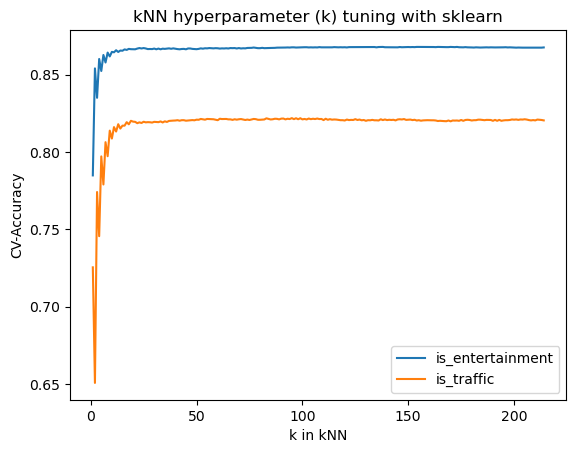

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

npr.seed(123)
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(dfnmf, labeldf[label[0]], test_size=0.2, random_state=434)
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(dfnmf, labeldf[label[1]], test_size=0.2, random_state=434)

k_values = np.arange(1, 215)

# 10 folds cross validation
cross_validation_fold = 10
accuracies_en = []
accuracies_tr = []

## Cross Validation for is_entertainment
for k in k_values:
    # instantiate kNN with given neighbor size k
    knn = KNeighborsClassifier(n_neighbors=k)
    # run cross validation for a given kNN setup
    # I have setup n_jobs=-1 to use all cpus in my env.
    scores = cross_val_score(knn, X_train_en, y_train_en, cv=cross_validation_fold, scoring='accuracy', n_jobs=-1)
    accuracies_en.append(scores.mean())
# print(accuracies_en)

for k in k_values:
    # instantiate kNN with given neighbor size k
    knn = KNeighborsClassifier(n_neighbors=k)
    # run cross validation for a given kNN setup
    # I have setup n_jobs=-1 to use all cpus in my env.
    scores = cross_val_score(knn, X_train_tr, y_train_tr, cv=cross_validation_fold, scoring='accuracy', n_jobs=-1)
    accuracies_tr.append(scores.mean())
# print(accuracies_tr)

fig_en = plt.figure()
fig_tr = plt.figure()
plt.plot(k_values, accuracies_en)
plt.plot(k_values, accuracies_tr)
plt.xlabel('k in kNN')
plt.ylabel('CV-Accuracy')
plt.legend(['is_entertainment','is_traffic'])
plt.title('kNN hyperparameter (k) tuning with sklearn')
plt.show()

best_k=[accuracies_en.index(max(accuracies_en)),accuracies_tr.index(max(accuracies_tr))]
# print(accuracies_tr.index(max(accuracies_tr)))
# print(accuracies_en.index(max(accuracies_en)))
# print(max(accuracies_tr))
# print(max(accuracies_en))


### KNN Model (with NMF)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

npr.seed(123)

for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(dfnmf, labeldf[label[j]], test_size=0.2, random_state=434)
        # create and fit the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=best_k[j])
    knn_model.fit(X_train, y_train)

        # make predictions on the test data
    y_pred = knn_model.predict(X_test)
        
                
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
        
    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")

is_entertainment
Accuracy: 0.87
[[3224    9]
 [ 476   36]] : is the confusion matrix
is_traffic
Accuracy: 0.82
[[  48  632]
 [  39 3026]] : is the confusion matrix
